# **Exercise 2: Sentiment analysis**

---

Import Libraries

In [1]:
import os
import tensorflow

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score, confusion_matrix ,accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score

from keras.models import Model, Sequential
from keras.optimizers import Adadelta, RMSprop, SGD, Adam
from keras.layers import Input, Dense, Flatten, Dropout
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Import Dataset: 

In [3]:
data = pd.read_table('/content/gdrive/My Drive/Colab Notebooks/movie_review_train.tsv',header=None,skiprows=1,names=['id','Sentiment','Review'])
X = data.Review
y = data.Sentiment
data.head(5)

,id,Sentiment,Review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [4]:
data.info()
print ("Rows: ", data.shape[0])
print ("Columns: ", data.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
id           25000 non-null object
Sentiment    25000 non-null int64
Review       25000 non-null object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB
Rows:  25000
Columns:  3


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer 

vectorizer = TfidfVectorizer( ngram_range = (1, 1))
vectorizer.fit(X)
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
rescaledX2 = vectorizer.transform(X)

{'with': 73342, 'all': 2662, 'this': 66562, 'stuff': 63783, 'going': 27963, 'down': 19854, 'at': 4753, 'the': 66339, 'moment': 43526, 'mj': 43300, 've': 70920, 'started': 62903, 'listening': 38991, 'to': 67125, 'his': 31095, 'music': 44529, 'watching': 72259, 'odd': 46634, 'documentary': 19380, 'here': 30670, 'and': 3258, 'there': 66432, 'watched': 72253, 'wiz': 73394, 'moonwalker': 43761, 'again': 2148, 'maybe': 41519, 'just': 35787, 'want': 72088, 'get': 27304, 'certain': 11378, 'insight': 33819, 'into': 34255, 'guy': 29233, 'who': 72904, 'thought': 66621, 'was': 72196, 'really': 53839, 'cool': 14695, 'in': 33004, 'eighties': 21129, 'make': 40421, 'up': 70331, 'my': 44639, 'mind': 42844, 'whether': 72768, 'he': 30211, 'is': 34585, 'guilty': 29057, 'or': 47142, 'innocent': 33729, 'part': 48525, 'biography': 7404, 'feature': 24077, 'film': 24536, 'which': 72773, 'remember': 54776, 'see': 58585, 'cinema': 12453, 'when': 72753, 'it': 34683, 'originally': 47276, 'released': 54664, 'some':

In [8]:
vect = CountVectorizer(stop_words='english', ngram_range = (1,1), max_df = .80, min_df = 4)
vect.fit(X_train)
rescaledX2 = vect.transform(X)

NameError: ignored

In [10]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX2, y, test_size=0.2, random_state=42)
# X_train, y_train = np.array(X_train), np.array(y_train) 

print ("Rows: ", data.shape[0])
print ("Columns: ", data.shape[1])

Rows:  25000
Columns:  3


Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

LGclassifier = LogisticRegression()
LGclassifier.fit(X_train, y_train)
LG_y_pred = LGclassifier.predict(X_test)
print(LG_y_pred)
LG_probs = LGclassifier.predict_proba(X_test)
LG_probs = LG_probs[:, 1]

accuracy_LR = accuracy_score(y_test, LG_y_pred) * 100
print('LogisticRegression - Accuracy: {:2.2f}%'.format(accuracy_LR))

score = cross_val_score(LGclassifier, X_train, y_train, cv = 10, scoring= 'accuracy')
print(score)

confusion = confusion_matrix(y_test, LG_y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print(confusion)

#Specificity: When the actual value is negative, how often is the prediction correct?
print("Specificity:",TN / float(TN + FP))

#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print("False Positive Rate:",FP / float(TN + FP))

#Precision: When a positive value is predicted, how often is the prediction correct?
print("Precision:",precision_score(y_test, LG_y_pred))

#Sensitivity:
print("Recall:",recall_score(y_test, LG_y_pred))

[0 1 0 ... 0 0 0]
LogisticRegression - Accuracy: 89.36%
[0.8865 0.895  0.8795 0.891  0.8875 0.8905 0.883  0.885  0.8825 0.8695]
[[2187  294]
 [ 238 2281]]
Specificity: 0.8814993954050786
False Positive Rate: 0.1185006045949214
Precision: 0.8858252427184466
Recall: 0.9055180627233029


Naive Bayes

In [12]:
NBClassifier = MultinomialNB()
NBClassifier.fit(X_train, y_train)
y_pred = NBClassifier.predict(X_test)

NB_probs = NBClassifier.predict_proba(X_test)
NB_probs = NB_probs[:, 1]

accuracy_NB = accuracy_score(y_test, y_pred) * 100
print('LogisticRegression - Accuracy: {:2.2f}%'.format(accuracy_NB))

score = cross_val_score(NBClassifier, X_train, y_train, cv = 10, scoring= 'accuracy')
print(score)

confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print(confusion)

#Specificity: When the actual value is negative, how often is the prediction correct?
print("Specificity:",TN / float(TN + FP))

#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print("False Positive Rate:",FP / float(TN + FP))

#Precision: When a positive value is predicted, how often is the prediction correct?
print("Precision:",precision_score(y_test, y_pred))

#Sensitivity:
print("Recall:",recall_score(y_test, LG_y_pred))

LogisticRegression - Accuracy: 85.92%
[0.877  0.8715 0.84   0.8755 0.869  0.8645 0.856  0.857  0.8495 0.8635]
[[2186  295]
 [ 409 2110]]
Specificity: 0.8810963321241435
False Positive Rate: 0.1189036678758565
Precision: 0.8773388773388774
Recall: 0.9055180627233029


Decision tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

DTclassifier= DecisionTreeClassifier(max_depth=100, random_state=0)
DTclassifier.fit(X_train, y_train)
y_pred = DTclassifier.predict(X_test)
print(y_pred)

DT_probs = DTclassifier.predict_proba(X_test)
DT_probs = DT_probs[:, 1]

accuracy_LR = accuracy_score(y_test, y_pred) * 100
print('DecisionTree - Accuracy: {:2.2f}%'.format(accuracy_LR))

score = cross_val_score(DTclassifier, X_train, y_train, cv = 10, scoring= 'accuracy')
print(score)

confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print(confusion)

#Specificity: When the actual value is negative, how often is the prediction correct?
print("Specificity:",TN / float(TN + FP))

#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print("False Positive Rate:",FP / float(TN + FP))

#Precision: When a positive value is predicted, how often is the prediction correct?
print("Precision:",precision_score(y_test, y_pred))

#Sensitivity:
print("Recall:",recall_score(y_test, y_pred))

[0 1 0 ... 0 0 0]
DecisionTree - Accuracy: 70.28%
[0.699  0.7195 0.712  0.685  0.7245 0.6835 0.684  0.7175 0.712  0.69  ]
[[1748  733]
 [ 753 1766]]
Specificity: 0.7045546150745667
False Positive Rate: 0.2954453849254333
Precision: 0.7066826730692277
Recall: 0.7010718539102818


Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(n_estimators=100,max_depth=100,min_samples_split=50,min_samples_leaf=100)
RFclassifier.fit(X_train, y_train)
y_pred=RFclassifier.predict(X_test)
print(y_pred)
RF_probs = RFclassifier.predict_proba(X_test)
RF_probs = RF_probs[:, 1]

accuracy_RF = accuracy_score(y_test, y_pred) * 100
print('RandomForest - Accuracy: {:2.2f}%'.format(accuracy_RF))
# print('RandomForest - Precision: {:2.2f}%'.format(precision_score(y_test, label)*100))
# print('RandomForest - Recall: {:2.2f}%'.format(recall_score(y_test, label)*100))
# print('RandomForest - F1: {:2.2f}%'.format(f1_score(y_test, label) * 100))


score = cross_val_score(RFclassifier, X_train,y_train, cv = 10, scoring= 'accuracy')
print(score)

confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print(confusion)

#Specificity: When the actual value is negative, how often is the prediction correct?
print("Specificity:",TN / float(TN + FP))

#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print("False Positive Rate:",FP / float(TN + FP))

#Precision: When a positive value is predicted, how often is the prediction correct?
print("Precision:", precision_score(y_test, y_pred))

#Sensitivity:
print("Recall:", recall_score(y_test, y_pred))

[0 1 0 ... 0 0 0]
RandomForest - Accuracy: 81.60%
[0.822 0.817 0.803 0.808 0.815 0.797 0.799 0.788 0.815 0.802]
[[2009  472]
 [ 448 2071]]
Specificity: 0.8097541313986296
False Positive Rate: 0.1902458686013704
Precision: 0.8143924498623673
Recall: 0.8221516474791584


SVM 

In [15]:
from sklearn import svm

SVMclassifier = svm.SVC(kernel='linear', probability=True) # Linear Kernel
#SVMclassifier = svm.SVC(kernel='poly', degree=3, probability=True) #polynomial kernel of degree 8
#SVMclassifier = svm.SVC(kernel='rbf', gamma=0.001) # rbf kernel
SVMclassifier.fit(X_train, y_train)
y_pred = SVMclassifier.predict(X_test)
print(y_pred)

SVM_probs_linear = SVMclassifier.predict_proba(X_test)
SVM_probs_linear = SVM_probs_linear[:, 1]

accuracy_SVM = accuracy_score(y_test, y_pred) * 100
print('SupportVectorMachine - Accuracy: {:2.2f}%'.format(accuracy_SVM))
# print('RandomForest - Precision: {:2.2f}%'.format(precision_score(y_test, label)*100))
# print('RandomForest - Recall: {:2.2f}%'.format(recall_score(y_test, label)*100))
# print('RandomForest - F1: {:2.2f}%'.format(f1_score(y_test, label) * 100))


# score = cross_val_score(SVMclassifier, X_train,y_train, cv = 10, scoring= 'accuracy')
# print(score)

confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print(confusion)

#Specificity: When the actual value is negative, how often is the prediction correct?
print("Specificity:",TN / float(TN + FP))

#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print("False Positive Rate:",FP / float(TN + FP))

#Precision: When a positive value is predicted, how often is the prediction correct?
print("Precision:", precision_score(y_test, y_pred))

#Sensitivity:
print("Recall:", recall_score(y_test, y_pred))

[0 1 0 ... 0 0 0]
SupportVectorMachine - Accuracy: 89.70%
[[2208  273]
 [ 242 2277]]
Specificity: 0.8899637243047158
False Positive Rate: 0.11003627569528417
Precision: 0.8929411764705882
Recall: 0.9039301310043668


KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

KNNclassifier = KNeighborsClassifier(n_neighbors=24)
KNNclassifier.fit(X_train, y_train)
y_pred=KNNclassifier.predict(X_test)
print(y_pred)
KNN_probs = KNNclassifier.predict_proba(X_test)
KNN_probs = KNN_probs[:, 1]

accuracy_KNN = accuracy_score(y_test, y_pred) * 100
print('k-nearestNeighbors - Accuracy: {:2.2f}%'.format(accuracy_KNN))
# print('RandomForest - Precision: {:2.2f}%'.format(precision_score(y_test, label)*100))
# print('RandomForest - Recall: {:2.2f}%'.format(recall_score(y_test, label)*100))
# print('RandomForest - F1: {:2.2f}%'.format(f1_score(y_test, label) * 100))


score = cross_val_score(KNNclassifier, X_train,y_train, cv = 10, scoring= 'accuracy')
print(score)

confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print(confusion)

#Specificity: When the actual value is negative, how often is the prediction correct?
print("Specificity:",TN / float(TN + FP))

#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print("False Positive Rate:",FP / float(TN + FP))

#Precision: When a positive value is predicted, how often is the prediction correct?
print("Precision:", precision_score(y_test, y_pred))

#Sensitivity:
print("Recall:", recall_score(y_test, y_pred))

[0 0 0 ... 0 0 0]
k-nearestNeighbors - Accuracy: 78.08%
[0.7685 0.7655 0.7615 0.78   0.767  0.7585 0.7665 0.7625 0.7685 0.7505]
[[2084  397]
 [ 699 1820]]
Specificity: 0.8399838774687626
False Positive Rate: 0.1600161225312374
Precision: 0.8209291835814163
Recall: 0.722508932115919


NN

In [19]:
NNclassifier = Sequential()
NNclassifier.add(Dense(units = 64, activation = 'relu', input_dim = 74849))
NNclassifier.add(Dropout(rate = 0.5))
NNclassifier.add(Dense(units = 128, activation = 'relu'))
NNclassifier.add(Dropout(rate = 0.5))
NNclassifier.add(Dense(units = 128, activation = 'relu'))
NNclassifier.add(Dropout(rate = 0.5))
#NNclassifier.add(Dense(units = 1, activation = 'softmax'))
NNclassifier.add(Dense(units = 1, activation = 'sigmoid'))
#NNclassifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
NNclassifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
NNclassifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                4790400   
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [20]:
NNclassifier.fit(X_train, y_train, epochs = 20, validation_split=0.2)
NN_y_pred = NNclassifier.predict(X_test)
print(y_pred)
NN_y_classes = NNclassifier.predict_classes(X_test)


confusion = confusion_matrix(y_test, NN_y_classes)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print(confusion)

#Specificity: When the actual value is negative, how often is the prediction correct?
print("Specificity:",TN / float(TN + FP))

#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print("False Positive Rate:",FP / float(TN + FP))

#Precision: When a positive value is predicted, how often is the prediction correct?
print("Precision:", precision_score(y_test, NN_y_classes))

#Sensitivity:
print("Recall:", recall_score(y_test, NN_y_classes))

# NN_probs = NNclassifier.predict_proba(X_test)
# NN_probs = NN_probs[:, 1]




Train on 16000 samples, validate on 4000 samples
Epoch 1/20





16000/16000 [==============================] - 56s 3ms/step - loss: 0.1222 - acc: 0.8259 - val_loss: 0.0847 - val_acc: 0.8860
Epoch 2/20
16000/16000 [==============================] - 53s 3ms/step - loss: 0.0445 - acc: 0.9417 - val_loss: 0.0900 - val_acc: 0.8852
Epoch 3/20
16000/16000 [==============================] - 53s 3ms/step - loss: 0.0234 - acc: 0.9710 - val_loss: 0.0968 - val_acc: 0.8832
Epoch 4/20
16000/16000 [==============================] - 53s 3ms/step - loss: 0.0150 - acc: 0.9806 - val_loss: 0.0976 - val_acc: 0.8795
Epoch 5/20
16000/16000 [==============================] - 52s 3ms/step - loss: 0.0111 - acc: 0.9859 - val_loss: 0.0999 - val_acc: 0.8800
Epoch 6/20
16000/16000 [==============================] - 52s 3ms/step - loss: 0.0094 - acc: 0.9882 - val_loss: 0.1042 - val_acc: 0.8760
Epoch 7/20
16000/16000 [==============================] - 52s 3ms/step - loss: 0.0078 - acc: 0.9903 - val_loss: 0.1090 - 

Evaluation: 

AUC score: LG- 0.9591195587457133
AUC score: DT- 0.6871133676681166
AUC score: RF- 0.8975556828162394
AUC score: SVM- 0.9623128631909779
AUC score: KNN- 0.864088709763876
AUC score: NN- 0.9523665286906973


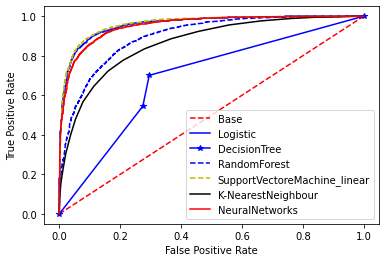

In [23]:
#area under curve
LG_auc = roc_auc_score(y_test, LG_probs)
print("AUC score: LG-", LG_auc)
DT_auc = roc_auc_score(y_test, DT_probs)
print("AUC score: DT-", DT_auc)
DT_auc = roc_auc_score(y_test, RF_probs)
print("AUC score: RF-", DT_auc)
SVM_auc = roc_auc_score(y_test, SVM_probs_linear)
print("AUC score: SVM-", SVM_auc)
KNN_auc = roc_auc_score(y_test, KNN_probs)
print("AUC score: KNN-", KNN_auc)
NN_auc = roc_auc_score(y_test, NN_y_pred)
print("AUC score: NN-", NN_auc)


#plot ROC curve
LG_fpr, LG_tpr, _ = roc_curve(y_test, LG_probs)
DT_fpr, Dt_tpr, _ = roc_curve(y_test, DT_probs)
RF_fpr, RF_tpr, _ = roc_curve(y_test, RF_probs)
SVM_fpr, SVM_tpr, _ = roc_curve(y_test, SVM_probs_linear)
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, KNN_probs)
NN_fpr, NN_tpr, _ = roc_curve(y_test, NN_y_pred)

plt.plot([0,1],[0,1],'r--', label='Base' )
# plot the roc curve for the model
plt.plot(LG_fpr, LG_tpr, 'b', label='Logistic')
plt.plot(DT_fpr, Dt_tpr, 'b-*', label='DecisionTree')
plt.plot(RF_fpr, RF_tpr, 'b--', label='RandomForest')
plt.plot(SVM_fpr, SVM_tpr, 'y--', label='SupportVectoreMachine_linear')
plt.plot(KNN_fpr, KNN_tpr, 'k', label='K-NearestNeighbour')
plt.plot(NN_fpr, NN_tpr, 'r-', label='NeuralNetworks')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()
